# Sentiment Analysis for Twitter Tweets: A Framework to Detect Sentiment using Naïve Bayes Algorithm

### TWITTER API

In [1]:
import tweepy as tw
my_api_key = "nZA1UP3eIW9KbRPOAXQZcN7nH"
my_api_secret = "S0KjwqFMo7RJAtoNBCcDjToHmYXfjXRVsni0VDJpv8fyEo48sf"
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### SEARCH QUERY

In [2]:
search_query = "@bongbongmarcos"

### SETTING NUMBER OF ITEMS

In [3]:
tweet = tw.Cursor(api.search, q=search_query, lang="en", since="2021-01-01").items(5000)
tweet_copy = []
for tweet in tweet:
    tweet_copy.append(tweet)    
print("Total Tweets fetched:", len(tweet_copy))

Total Tweets fetched: 5000


### DATAFRAME - FIRST 5 ROW

In [4]:
%%time
import pandas as pd
pd.set_option('display.max_colwidth', 200)
data = pd.DataFrame()
for tweet in tweet_copy:
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    data = data.append(pd.DataFrame({'user_name': tweet.user.name, 'date': tweet.created_at,'text': text, 'hashtags': [hashtags if hashtags else None],'source': tweet.source}))
    data = data.reset_index(drop=True)
data.head(5)

Wall time: 50min 16s


,user_name,date,text,hashtags,source
0,bendel07,2022-03-08 03:02:13,RT @tmtcathyvalente: NOW: Presidential aspiran...,None,Twitter for iPhone
1,Lanags37,2022-03-08 03:02:12,RT @MJ__Mondejar: WATCH: Presidential candidat...,None,Twitter for Android
2,iamstrong ✌️🐅❤️💚🦅👊,2022-03-08 03:01:01,RT @MJ__Mondejar: WATCH: Presidential candidat...,None,Twitter for iPhone
3,Dolores / ᴹᴬᴵᴺᴱ/ᴬʳᴹᴸ💟ᵛᵉʳˢ ᴳʳᵒᵘᵖ²,2022-03-08 03:00:29,RT @bongbongmarcos: Maligayang kaarawan sa ati...,None,Twitter for Android
4,Maria C A. Cervantes,2022-03-08 03:00:07,My、my!Herbert Bautista just pulled a standing ...,None,Twitter Web App


### DATAFRAME - LAST 5 ROW

In [5]:
data.tail(5)

,user_name,date,text,hashtags,source
4995,utopiandream,2022-03-03 08:30:02,RT @beimax06: Oh my pops @bongbongmarcos super...,None,Twitter for Android
4996,Shodai Hokage 💪🏻,2022-03-03 08:30:00,@KimIndar @bongbongmarcos @lenirobredo Kakampo...,None,Twitter for Android
4997,cresjaycat,2022-03-03 08:28:42,RT @smninews: LOOK: Batangas Gov. Dodo Mandana...,None,Twitter for Android
4998,cresjaycat,2022-03-03 08:28:30,RT @smninews: LOOK: Batangas Gov. Dodo Mandana...,None,Twitter for Android
4999,Marigay Valerio,2022-03-03 08:23:33,RT @smninews: LOOK: Batangas Gov. Dodo Mandana...,None,Twitter for Android


### DESCRIBING DATA

DATA TYPES

In [6]:
data.dtypes

user_name            object
date         datetime64[ns]
text                 object
hashtags             object
source               object
dtype: object

COLUMNS HEADER

In [7]:
data.columns

Index(['user_name', 'date', 'text', 'hashtags', 'source'], dtype='object')

RANGE

In [8]:
data.index

RangeIndex(start=0, stop=5000, step=1)

NUMBER OF ROWS AND COLUMNS

In [9]:
data.shape

(5000, 5)

DATA INFORMATION

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_name  5000 non-null   object        
 1   date       5000 non-null   datetime64[ns]
 2   text       5000 non-null   object        
 3   hashtags   324 non-null    object        
 4   source     5000 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 195.4+ KB


In the study, all we'll get is text, we will remove unnecessary

DROP UNNECESSARY COLUMNS

In [11]:
data = data.drop(['user_name'], axis=1)
data = data.drop(['date'], axis=1)
data = data.drop(['hashtags'], axis=1)
data = data.drop(['source'], axis=1)

CHECK DATA INFORMATION

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


DATAFRAME - FIRST 5 ROW

In [13]:
data.head(5)

,text
0,RT @tmtcathyvalente: NOW: Presidential aspiran...
1,RT @MJ__Mondejar: WATCH: Presidential candidat...
2,RT @MJ__Mondejar: WATCH: Presidential candidat...
3,RT @bongbongmarcos: Maligayang kaarawan sa ati...
4,My、my!Herbert Bautista just pulled a standing ...


DATAFRAME - LAST 5 ROW

In [15]:
data.tail(5)

,text
4995,RT @beimax06: Oh my pops @bongbongmarcos super...
4996,@KimIndar @bongbongmarcos @lenirobredo Kakampo...
4997,RT @smninews: LOOK: Batangas Gov. Dodo Mandana...
4998,RT @smninews: LOOK: Batangas Gov. Dodo Mandana...
4999,RT @smninews: LOOK: Batangas Gov. Dodo Mandana...


### BASIC TEXT PREPROCESSING

1. A. SET TEXT LOWERCASE - FIRST 5 ROW

In [17]:
pd.set_option('display.max_colwidth', 200)
data['lc'] = data['text'].str.lower()
data[['text', 'lc']].head(5)

,text,lc
0,RT @tmtcathyvalente: NOW: Presidential aspirant @bongbongmarcos \nand his UniTeam Alliance hold grand rally here at Guiguinto Municipal Oval…,rt @tmtcathyvalente: now: presidential aspirant @bongbongmarcos \nand his uniteam alliance hold grand rally here at guiguinto municipal oval…
1,RT @MJ__Mondejar: WATCH: Presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in Bulacan today. | @s…,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…
2,RT @MJ__Mondejar: WATCH: Presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in Bulacan today. | @s…,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…
3,RT @bongbongmarcos: Maligayang kaarawan sa ating Tiktok heartthrob! Continue to be an inspiration to all! We are proud of what you have bec…,rt @bongbongmarcos: maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…
4,My、my!Herbert Bautista just pulled a standing ovation vs this ANC interrogator who does nothing but invite those she perceives as pro-@bongbongmarcos then fries them on air on exhaustingly recycle...,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro-@bongbongmarcos then fries them on air on exhaustingly recycle...


1. B. SET TEXT LOWERCASE - LAST 5 ROW

In [18]:
data[['text', 'lc']].tail(5)

,text,lc
4995,RT @beimax06: Oh my pops @bongbongmarcos super gentleman naman❤️ Big Respect to our Muslim sisters and brothers 💚👏 @indaysara\nCheck out ⒻⒼⓋ…,rt @beimax06: oh my pops @bongbongmarcos super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 @indaysara\ncheck out ⓕⓖⓥ…
4996,@KimIndar @bongbongmarcos @lenirobredo Kakampotas you have 67 days 😭😭😭,@kimindar @bongbongmarcos @lenirobredo kakampotas you have 67 days 😭😭😭
4997,RT @smninews: LOOK: Batangas Gov. Dodo Mandanas and Vice Gov. Mark Leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…
4998,RT @smninews: LOOK: Batangas Gov. Dodo Mandanas and Vice Gov. Mark Leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…
4999,RT @smninews: LOOK: Batangas Gov. Dodo Mandanas and Vice Gov. Mark Leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…


2. A. REMOVE UNWANTED SPACES - FIRST 5 ROW

In [19]:
import re
data['us'] = data['lc'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
data[['lc', 'us']].head(5)

,lc,us
0,rt @tmtcathyvalente: now: presidential aspirant @bongbongmarcos \nand his uniteam alliance hold grand rally here at guiguinto municipal oval…,rt @tmtcathyvalente: now: presidential aspirant @bongbongmarcos and his uniteam alliance hold grand rally here at guiguinto municipal oval…
1,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…
2,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…
3,rt @bongbongmarcos: maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…,rt @bongbongmarcos: maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…
4,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro-@bongbongmarcos then fries them on air on exhaustingly recycle...,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro-@bongbongmarcos then fries them on air on exhaustingly recycle...


2. B. REMOVE UNWANTED SPACES - LAST 5 ROW

In [21]:
data[['lc', 'us']].tail(5)

,lc,us
4995,rt @beimax06: oh my pops @bongbongmarcos super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 @indaysara\ncheck out ⓕⓖⓥ…,rt @beimax06: oh my pops @bongbongmarcos super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 @indaysara check out ⓕⓖⓥ…
4996,@kimindar @bongbongmarcos @lenirobredo kakampotas you have 67 days 😭😭😭,@kimindar @bongbongmarcos @lenirobredo kakampotas you have 67 days 😭😭😭
4997,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…
4998,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…
4999,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…


3. A. REMOVE URL - FIRST 5 ROW

In [22]:
data['url'] = data['us'].apply(lambda x:re.sub(r"http\S+|https\S+", "", x, flags = re.MULTILINE))
data[['us', 'url']].head(5)

,us,url
0,rt @tmtcathyvalente: now: presidential aspirant @bongbongmarcos and his uniteam alliance hold grand rally here at guiguinto municipal oval…,rt @tmtcathyvalente: now: presidential aspirant @bongbongmarcos and his uniteam alliance hold grand rally here at guiguinto municipal oval…
1,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…
2,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…
3,rt @bongbongmarcos: maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…,rt @bongbongmarcos: maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…
4,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro-@bongbongmarcos then fries them on air on exhaustingly recycle...,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro-@bongbongmarcos then fries them on air on exhaustingly recycle...


3. B REMOVE URL - LAST 5 ROW

In [23]:
data[['us', 'url']].tail(5)

,us,url
4995,rt @beimax06: oh my pops @bongbongmarcos super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 @indaysara check out ⓕⓖⓥ…,rt @beimax06: oh my pops @bongbongmarcos super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 @indaysara check out ⓕⓖⓥ…
4996,@kimindar @bongbongmarcos @lenirobredo kakampotas you have 67 days 😭😭😭,@kimindar @bongbongmarcos @lenirobredo kakampotas you have 67 days 😭😭😭
4997,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…
4998,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…
4999,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…


4. A. REMOVE HTML ENCONDINGS - FIRST 5 ROW

In [24]:
data['html'] = data['url'].apply(lambda x: re.sub('<[^<]+?>', '', x))
data[['url', 'html']].head(5)

,url,html
0,rt @tmtcathyvalente: now: presidential aspirant @bongbongmarcos and his uniteam alliance hold grand rally here at guiguinto municipal oval…,rt @tmtcathyvalente: now: presidential aspirant @bongbongmarcos and his uniteam alliance hold grand rally here at guiguinto municipal oval…
1,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…
2,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…
3,rt @bongbongmarcos: maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…,rt @bongbongmarcos: maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…
4,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro-@bongbongmarcos then fries them on air on exhaustingly recycle...,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro-@bongbongmarcos then fries them on air on exhaustingly recycle...


5. B. REMOVE HTML ENCODINGS - LAST 5 ROW

In [26]:
data[['url', 'html']].tail(5)

,url,html
4995,rt @beimax06: oh my pops @bongbongmarcos super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 @indaysara check out ⓕⓖⓥ…,rt @beimax06: oh my pops @bongbongmarcos super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 @indaysara check out ⓕⓖⓥ…
4996,@kimindar @bongbongmarcos @lenirobredo kakampotas you have 67 days 😭😭😭,@kimindar @bongbongmarcos @lenirobredo kakampotas you have 67 days 😭😭😭
4997,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…
4998,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…
4999,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…


6. A. REMOVE USERNAMES - FIRST 5 ROW

In [27]:
data['un'] = data['html'].apply(lambda x: re.sub('@[A-Za-z0-9]+', '', x))
data[['html', 'un']].head(5)

,html,un
0,rt @tmtcathyvalente: now: presidential aspirant @bongbongmarcos and his uniteam alliance hold grand rally here at guiguinto municipal oval…,rt : now: presidential aspirant and his uniteam alliance hold grand rally here at guiguinto municipal oval…
1,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…,rt __mondejar: watch: presidential candidate and running mate goes to series of events in bulacan today. | …
2,rt @mj__mondejar: watch: presidential candidate @bongbongmarcos and running mate @indaysara goes to series of events in bulacan today. | @s…,rt __mondejar: watch: presidential candidate and running mate goes to series of events in bulacan today. | …
3,rt @bongbongmarcos: maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…,rt : maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…
4,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro-@bongbongmarcos then fries them on air on exhaustingly recycle...,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro- then fries them on air on exhaustingly recycled issues;her ve...


6. B. REMOVE USERNAMES - LAST 5 ROW

In [28]:
data[['html', 'un']].tail(5)

,html,un
4995,rt @beimax06: oh my pops @bongbongmarcos super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 @indaysara check out ⓕⓖⓥ…,rt : oh my pops super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 check out ⓕⓖⓥ…
4996,@kimindar @bongbongmarcos @lenirobredo kakampotas you have 67 days 😭😭😭,kakampotas you have 67 days 😭😭😭
4997,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt : look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the - tandem for the 2022 elec…
4998,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt : look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the - tandem for the 2022 elec…
4999,rt @smninews: look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the @bongbongmarcos-@indaysara tandem for the 2022 elec…,rt : look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the - tandem for the 2022 elec…


7. A. REMOVE PUNCTUATIONS, NUMBERS, EMOJIS, ETC. - FIRST 5 ROW

In [31]:
data['pne'] = data['un'].apply(lambda x: re.sub('[^A-Za-z]', ' ', x))
data[['un', 'pne']].head(5)

,un,pne
0,rt : now: presidential aspirant and his uniteam alliance hold grand rally here at guiguinto municipal oval…,rt now presidential aspirant and his uniteam alliance hold grand rally here at guiguinto municipal oval
1,rt __mondejar: watch: presidential candidate and running mate goes to series of events in bulacan today. | …,rt mondejar watch presidential candidate and running mate goes to series of events in bulacan today
2,rt __mondejar: watch: presidential candidate and running mate goes to series of events in bulacan today. | …,rt mondejar watch presidential candidate and running mate goes to series of events in bulacan today
3,rt : maligayang kaarawan sa ating tiktok heartthrob! continue to be an inspiration to all! we are proud of what you have bec…,rt maligayang kaarawan sa ating tiktok heartthrob continue to be an inspiration to all we are proud of what you have bec
4,my、my!herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro- then fries them on air on exhaustingly recycled issues;her ve...,my my herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro then fries them on air on exhaustingly recycled issues her ve...


8. B. REMOVE PUNCTUATIONS, NUMBERS, EMOJIS, ETC. - LAST 5 ROW

In [32]:
data[['un', 'pne']].tail(5)

,un,pne
4995,rt : oh my pops super gentleman naman❤️ big respect to our muslim sisters and brothers 💚👏 check out ⓕⓖⓥ…,rt oh my pops super gentleman naman big respect to our muslim sisters and brothers check out
4996,kakampotas you have 67 days 😭😭😭,kakampotas you have days
4997,rt : look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the - tandem for the 2022 elec…,rt look batangas gov dodo mandanas and vice gov mark leviste endorses the tandem for the elec
4998,rt : look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the - tandem for the 2022 elec…,rt look batangas gov dodo mandanas and vice gov mark leviste endorses the tandem for the elec
4999,rt : look: batangas gov. dodo mandanas and vice gov. mark leviste endorses the - tandem for the 2022 elec…,rt look batangas gov dodo mandanas and vice gov mark leviste endorses the tandem for the elec


9. A. REMOVE 3 AND LESS CHARACTERS - FIRST 5 ROW

In [39]:
data['three'] = data['pne'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data[['pne', 'three']].head(5)

,pne,three
0,rt now presidential aspirant and his uniteam alliance hold grand rally here at guiguinto municipal oval,presidential aspirant uniteam alliance hold grand rally here guiguinto municipal oval
1,rt mondejar watch presidential candidate and running mate goes to series of events in bulacan today,mondejar watch presidential candidate running mate goes series events bulacan today
2,rt mondejar watch presidential candidate and running mate goes to series of events in bulacan today,mondejar watch presidential candidate running mate goes series events bulacan today
3,rt maligayang kaarawan sa ating tiktok heartthrob continue to be an inspiration to all we are proud of what you have bec,maligayang kaarawan ating tiktok heartthrob continue inspiration proud what have
4,my my herbert bautista just pulled a standing ovation vs this anc interrogator who does nothing but invite those she perceives as pro then fries them on air on exhaustingly recycled issues her ve...,herbert bautista just pulled standing ovation this interrogator does nothing invite those perceives then fries them exhaustingly recycled issues verbal verbal communication


9. B. REMOVE 3 AND LESS CHARACTERS - LAST 5 ROW

In [35]:
data[['pne', 'two']].tail(5)

,pne,two
4995,rt oh my pops super gentleman naman big respect to our muslim sisters and brothers check out,pops super gentleman naman respect muslim sisters brothers check
4996,kakampotas you have days,kakampotas have days
4997,rt look batangas gov dodo mandanas and vice gov mark leviste endorses the tandem for the elec,look batangas dodo mandanas vice mark leviste endorses tandem elec
4998,rt look batangas gov dodo mandanas and vice gov mark leviste endorses the tandem for the elec,look batangas dodo mandanas vice mark leviste endorses tandem elec
4999,rt look batangas gov dodo mandanas and vice gov mark leviste endorses the tandem for the elec,look batangas dodo mandanas vice mark leviste endorses tandem elec


### INTERMEDIATE TEXT PREPROCESSING

STOPWORD

In the study, just focus on english

In [36]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

1. A. REMOVE STOPWORD - FIRST 5 ROW

In [40]:
from nltk.tokenize import word_tokenize
def def_sw(texts):    
    tweet_tokens = word_tokenize(texts)
    sw = [word for word in tweet_tokens if word not in stop]        
    return " ".join(sw)
data['sw'] = data['three'].apply(lambda x: def_sw(x))
data[['three', 'sw']].head(5)

,three,sw
0,presidential aspirant uniteam alliance hold grand rally here guiguinto municipal oval,presidential aspirant uniteam alliance hold grand rally guiguinto municipal oval
1,mondejar watch presidential candidate running mate goes series events bulacan today,mondejar watch presidential candidate running mate goes series events bulacan today
2,mondejar watch presidential candidate running mate goes series events bulacan today,mondejar watch presidential candidate running mate goes series events bulacan today
3,maligayang kaarawan ating tiktok heartthrob continue inspiration proud what have,maligayang kaarawan ating tiktok heartthrob continue inspiration proud
4,herbert bautista just pulled standing ovation this interrogator does nothing invite those perceives then fries them exhaustingly recycled issues verbal verbal communication,herbert bautista pulled standing ovation interrogator nothing invite perceives fries exhaustingly recycled issues verbal verbal communication


1. B. REMOVE STOPWORD - LAST 5 ROW

In [42]:
data[['three', 'sw']].tail(5)

,three,sw
4995,pops super gentleman naman respect muslim sisters brothers check,pops super gentleman naman respect muslim sisters brothers check
4996,kakampotas have days,kakampotas days
4997,look batangas dodo mandanas vice mark leviste endorses tandem elec,look batangas dodo mandanas vice mark leviste endorses tandem elec
4998,look batangas dodo mandanas vice mark leviste endorses tandem elec,look batangas dodo mandanas vice mark leviste endorses tandem elec
4999,look batangas dodo mandanas vice mark leviste endorses tandem elec,look batangas dodo mandanas vice mark leviste endorses tandem elec


1. A. LEMMATIZING - FIRST 5 ROW

In [43]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def def_lt(tweets):     
    tweet_tokens = word_tokenize(tweets)
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos = 'a') for w in tweet_tokens] #adjective
    lemma_words = [lemmatizer.lemmatize(w, pos = 'n') for w in lemma_words]  #nouns
    lemma_words = [lemmatizer.lemmatize(w, pos = 'r') for w in lemma_words]  #adverb
    lemma_words = [lemmatizer.lemmatize(w, pos = 'v') for w in lemma_words]  #verb  
    return " ".join(lemma_words)
data['lt'] = data['sw'].apply(lambda x: def_lt(x))
data[['sw', 'lt']].head(5)

,sw,lt
0,presidential aspirant uniteam alliance hold grand rally guiguinto municipal oval,presidential aspirant uniteam alliance hold grand rally guiguinto municipal oval
1,mondejar watch presidential candidate running mate goes series events bulacan today,mondejar watch presidential candidate run mate go series event bulacan today
2,mondejar watch presidential candidate running mate goes series events bulacan today,mondejar watch presidential candidate run mate go series event bulacan today
3,maligayang kaarawan ating tiktok heartthrob continue inspiration proud,maligayang kaarawan ating tiktok heartthrob continue inspiration proud
4,herbert bautista pulled standing ovation interrogator nothing invite perceives fries exhaustingly recycled issues verbal verbal communication,herbert bautista pull stand ovation interrogator nothing invite perceive fry exhaustingly recycle issue verbal verbal communication


1. B. LEMMATIZING - LAST 5 ROW

In [44]:
data[['sw', 'lt']].tail(5)

,sw,lt
4995,pops super gentleman naman respect muslim sisters brothers check,pop super gentleman naman respect muslim sister brother check
4996,kakampotas days,kakampotas day
4997,look batangas dodo mandanas vice mark leviste endorses tandem elec,look batangas dodo mandanas vice mark leviste endorse tandem elec
4998,look batangas dodo mandanas vice mark leviste endorses tandem elec,look batangas dodo mandanas vice mark leviste endorse tandem elec
4999,look batangas dodo mandanas vice mark leviste endorses tandem elec,look batangas dodo mandanas vice mark leviste endorse tandem elec


1. A. REMOVE DUPLICATE WORD - FIRST 5 ROW

In [45]:
from collections import OrderedDict
data['dc'] = (data['lt'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))
data[['lt', 'dc']].head(5)

,lt,dc
0,presidential aspirant uniteam alliance hold grand rally guiguinto municipal oval,presidential aspirant uniteam alliance hold grand rally guiguinto municipal oval
1,mondejar watch presidential candidate run mate go series event bulacan today,mondejar watch presidential candidate run mate go series event bulacan today
2,mondejar watch presidential candidate run mate go series event bulacan today,mondejar watch presidential candidate run mate go series event bulacan today
3,maligayang kaarawan ating tiktok heartthrob continue inspiration proud,maligayang kaarawan ating tiktok heartthrob continue inspiration proud
4,herbert bautista pull stand ovation interrogator nothing invite perceive fry exhaustingly recycle issue verbal verbal communication,herbert bautista pull stand ovation interrogator nothing invite perceive fry exhaustingly recycle issue verbal communication


1. B. REMOVE DUPLICATE - LAST 5 ROW

In [46]:
data[['lt', 'dc']].tail(5)

,lt,dc
4995,pop super gentleman naman respect muslim sister brother check,pop super gentleman naman respect muslim sister brother check
4996,kakampotas day,kakampotas day
4997,look batangas dodo mandanas vice mark leviste endorse tandem elec,look batangas dodo mandanas vice mark leviste endorse tandem elec
4998,look batangas dodo mandanas vice mark leviste endorse tandem elec,look batangas dodo mandanas vice mark leviste endorse tandem elec
4999,look batangas dodo mandanas vice mark leviste endorse tandem elec,look batangas dodo mandanas vice mark leviste endorse tandem elec


RENAMING cleaned_text from dc

In [49]:
data['cleaned_text'] =  data['dc']

Can save it

In [50]:
data.to_csv('dataset_modify.csv') 

### SENTIMENT ANALYSIS

VADER

In [51]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
data['compound'] = [analyzer.polarity_scores(v)['compound']*100 for v in data['lt']]
data['neg'] = [analyzer.polarity_scores(v)['neg']*100 for v in data['lt']]
data['neu'] = [analyzer.polarity_scores(v)['neu']*100 for v in data['lt']]
data['pos'] = [analyzer.polarity_scores(v)['pos']*100 for v in data['lt']]
data[['cleaned_text', 'neg', 'neu', 'pos', 'compound']].round(2).head(10)

,cleaned_text,neg,neu,pos,compound
0,presidential aspirant uniteam alliance hold grand rally guiguinto municipal oval,0.0,75.0,25.0,45.88
1,mondejar watch presidential candidate run mate go series event bulacan today,0.0,100.0,0.0,0.00
2,mondejar watch presidential candidate run mate go series event bulacan today,0.0,100.0,0.0,0.00
3,maligayang kaarawan ating tiktok heartthrob continue inspiration proud,0.0,48.0,52.0,75.79
4,herbert bautista pull stand ovation interrogator nothing invite perceive fry exhaustingly recycle issue verbal communication,8.8,91.2,0.0,-11.39
5,agree,0.0,0.0,100.0,36.12
6,maligayang kaarawan ating tiktok heartthrob continue inspiration proud,0.0,48.0,52.0,75.79
7,happy birthday sandro,0.0,35.1,64.9,57.19
8,maligayang kaarawan ating tiktok heartthrob continue inspiration proud,0.0,48.0,52.0,75.79
9,mondejar watch presidential candidate run mate go series event bulacan today,0.0,100.0,0.0,0.00


SENTIMENT LABELED

In [61]:
def Analysis(score): 
    if score >= 0.05:
        return 1
    elif score <= -0.05:
        return 0
    else:
        return 2
data["st"] = data["compound"].apply(Analysis)
data[['cleaned_text', 'st']].head(10)

,cleaned_text,st
0,presidential aspirant uniteam alliance hold grand rally guiguinto municipal oval,1
1,mondejar watch presidential candidate run mate go series event bulacan today,2
2,mondejar watch presidential candidate run mate go series event bulacan today,2
3,maligayang kaarawan ating tiktok heartthrob continue inspiration proud,1
4,herbert bautista pull stand ovation interrogator nothing invite perceive fry exhaustingly recycle issue verbal communication,0
5,agree,1
6,maligayang kaarawan ating tiktok heartthrob continue inspiration proud,1
7,happy birthday sandro,1
8,maligayang kaarawan ating tiktok heartthrob continue inspiration proud,1
9,mondejar watch presidential candidate run mate go series event bulacan today,2


SENTIMENT - BAR PLOT

<AxesSubplot:xlabel='st', ylabel='count'>

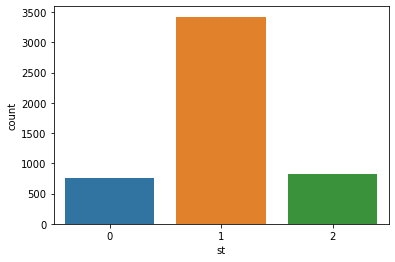

In [53]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(data.st)

NUMBER OF SENTIMENT

In [55]:
data['st'].value_counts()

1    3422
2     817
0     761
Name: st, dtype: int64

MOST FREQUENTLY WORD - BAR PLOT

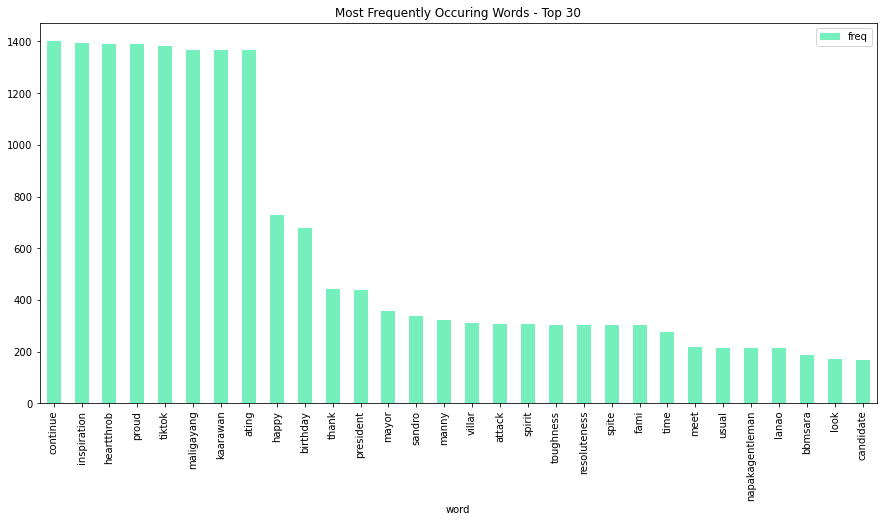

In [56]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
cbs = '#75f0bd'
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.cleaned_text)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = cbs)
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

NUMBER OF MOST FREQUENTLY WORD

In [57]:
frequency.head(30)

,word,freq
0,continue,1402
1,inspiration,1395
2,heartthrob,1391
3,proud,1391
4,tiktok,1383
5,maligayang,1368
6,kaarawan,1368
7,ating,1368
8,happy,729
9,birthday,678


Now let's try to put a sentiment on every word 

### BY WORDS

In [59]:
words_df = pd.DataFrame(frequency)

VADER

In [60]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
words_df['compound'] = [analyzer.polarity_scores(v)['compound']*100 for v in words_df['word']]
words_df['neg'] = [analyzer.polarity_scores(v)['neg']*100 for v in words_df['word']]
words_df['neu'] = [analyzer.polarity_scores(v)['neu']*100 for v in words_df['word']]
words_df['pos'] = [analyzer.polarity_scores(v)['pos']*100 for v in words_df['word']]
words_df[['word', 'neg', 'neu', 'pos', 'compound']].round(2).head(10)

,word,neg,neu,pos,compound
0,continue,0.0,100.0,0.0,0.00
1,inspiration,0.0,0.0,100.0,52.67
2,heartthrob,0.0,100.0,0.0,0.00
3,proud,0.0,0.0,100.0,47.67
4,tiktok,0.0,100.0,0.0,0.00
5,maligayang,0.0,100.0,0.0,0.00
6,kaarawan,0.0,100.0,0.0,0.00
7,ating,0.0,100.0,0.0,0.00
8,happy,0.0,0.0,100.0,57.19
9,birthday,0.0,100.0,0.0,0.00


SENTIMENT LABELED

In [63]:
def tweet_analysis(score): 
    if score >= 0.05:
        return 1
    elif score <= -0.05:
        return 0
    else:
        return 2
words_df["labeled"] = words_df["compound"].apply(tweet_analysis)
words_df[['word', 'labeled']].head(10)

,word,labeled
0,continue,2
1,inspiration,1
2,heartthrob,2
3,proud,1
4,tiktok,2
5,maligayang,2
6,kaarawan,2
7,ating,2
8,happy,1
9,birthday,2


SENTIMENT - BAR PLOT

<AxesSubplot:xlabel='labeled', ylabel='count'>

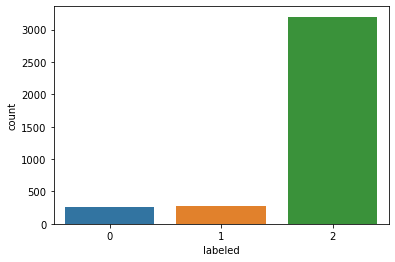

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(words_df.labeled)

NUMBER OF SENTIMENT

In [ ]:
words_df['labeled'].value_counts()

2    3199
1     273
0     254
Name: labeled, dtype: int64

FIRST 10 LARGEST POSITIVE VALUES

In [64]:
words_df[['word', 'pos', 'compound']].nlargest(10, ['pos']).reset_index(drop=True)

,word,pos,compound
0,inspiration,100.0,52.67
1,proud,100.0,47.67
2,happy,100.0,57.19
3,thank,100.0,36.12
4,spirit,100.0,17.79
5,love,100.0,63.69
6,support,100.0,40.19
7,bless,100.0,42.15
8,supporter,100.0,27.32
9,good,100.0,44.04


FIRS|T 10 LARGEST NEGATIVE VALUES

In [65]:
words_df[['word', 'neg', 'compound']].nlargest(10, ['neg']).reset_index(drop=True)

,word,neg,compound
0,attack,100.0,-47.67
1,toughness,100.0,-5.16
2,spite,100.0,-52.67
3,angry,100.0,-51.06
4,hate,100.0,-57.19
5,conflict,100.0,-31.82
6,leave,100.0,-5.16
7,thief,100.0,-52.67
8,propaganda,100.0,-25.00
9,fake,100.0,-47.67


WORDCLOUD POSITIVE

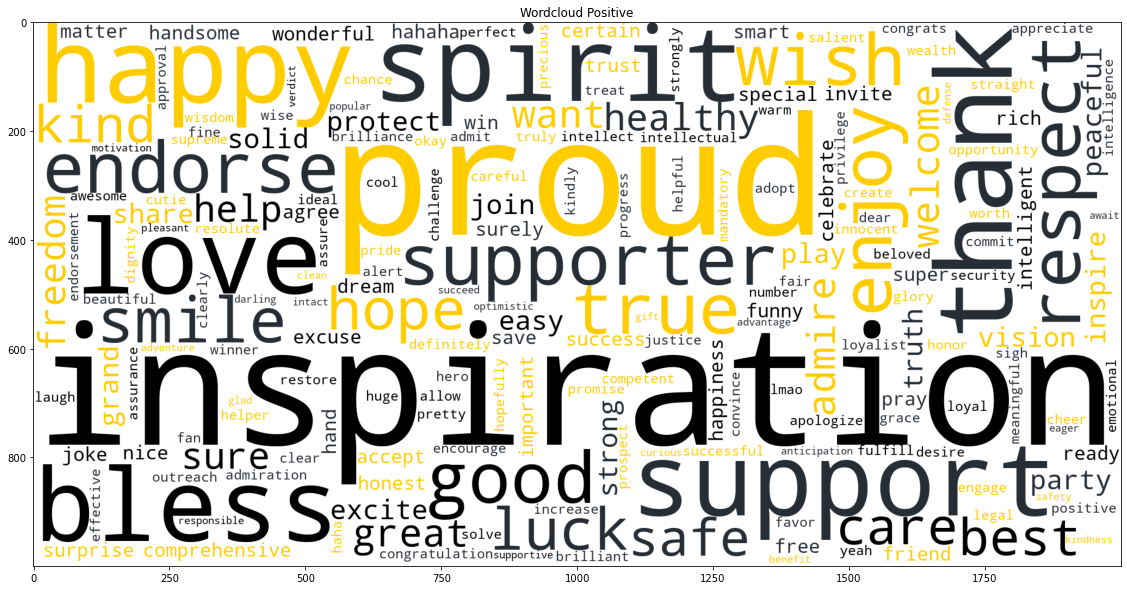

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from matplotlib import colors
color_list=['#262D35','#ffcc00','#000002',]
colormap=colors.ListedColormap(color_list)
words = ' '.join([Text for Text in words_df[words_df['labeled']==1]['word']])
wordCloud = WordCloud(background_color='white',colormap=colormap, mode="RGB", width=2000 , height=1000).generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Positive")
plt.show()

WORCLOUD NEGATIVE

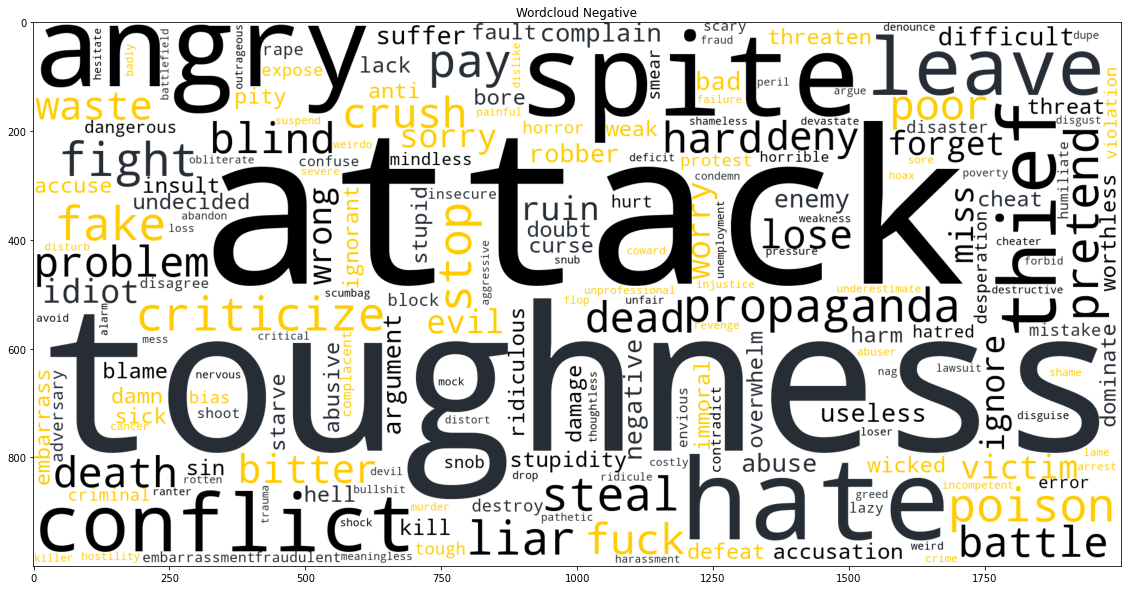

In [67]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
from matplotlib import colors
from nltk.corpus import stopwords
color_list=['#262D35','#ffcc00','#000002',]
colormap=colors.ListedColormap(color_list)
words = ' '.join([Text for Text in words_df[words_df['labeled']==0]['word']])
wordCloud = WordCloud(background_color='white',colormap=colormap, mode="RGB", width=2000 , height=1000).generate(words)
plt.figure(figsize=(20,10))
plt.imshow(wordCloud)
plt.title("Wordcloud Negative")
plt.show()

try to plot using TextBlob

TEXTBLOB

In [68]:
from textblob import TextBlob
def get_sub(Tweets):
    return TextBlob(Tweets).sentiment.subjectivity
def get_pol(Tweets):
    return TextBlob(Tweets).sentiment.polarity
words_df['subjectivity'] = words_df['word'].apply(get_sub)
words_df['polarity'] = words_df['word'].apply(get_pol)
words_df[['word', 'subjectivity', 'polarity','labeled']].head(10)#.reset_index(drop=True)

,word,subjectivity,polarity,labeled
0,continue,0.0,0.0,2
1,inspiration,0.0,0.0,1
2,heartthrob,0.0,0.0,2
3,proud,1.0,0.8,1
4,tiktok,0.0,0.0,2
5,maligayang,0.0,0.0,2
6,kaarawan,0.0,0.0,2
7,ating,0.0,0.0,2
8,happy,1.0,0.8,1
9,birthday,0.0,0.0,2


SUBJECTIVITY VS OBJECTIVITY

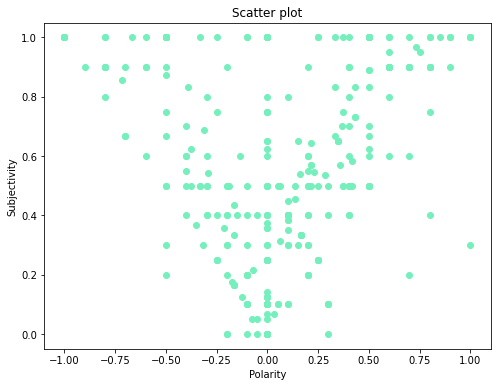

In [69]:
cbs = '#75f0bd'
import numpy
plt.figure(figsize=(8,6))
for i in range(0, words_df.shape[0]):
    plt.scatter(words_df['polarity'][i], words_df['subjectivity'][i], color=cbs)   
plt.title('Scatter plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

### SUPERVISED LEARNING APROACH

Dataset https://www.kaggle.com/ashwiniyer176/toxic-tweets-dataset

In [72]:
import pandas as pd
dataset = pd.read_csv('dataset.csv')
dataset.iloc[5050:5057]

,labeled,tweet
5050,1,"my #friends are a real piece of work, always taking advantage of me and tricking me ð i'm so and #annoyed right now! ð¡"
5051,1,solidarity with orlando ð #solidaritywithorlando #praying #sendinglove #orlando #news #lgbtâ¦
5052,1,"regram @user it's the #weekend! i'm such a #girl! i got lots of sleep, hung out withâ¦"
5053,0,@user @user you can go ahead &amp; change your profile pic. hepburn was an ambassador to unicef &amp; your ignorance would haveâ¦
5054,1,the search for the toddler who was grabbed by the alligator at disney has switched from rescue to recovery. so .
5055,1,@user omg can't wait for the fosters to come back tomorrow ðð
5056,1,@user kids: over a dozen ways to help #motherood #dads #classroom


In [73]:
dataset.shape

(56745, 2)

In [75]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def preprocess(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    tweet = re.sub(r"http\S+|https\S+", "", tweet, flags = re.MULTILINE)
    tweet = BeautifulSoup(tweet, 'lxml').get_text()
    tweet = re.sub('@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub("[^a-zA-Z]", ' ', tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [word for word in tweet_tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos = 'a') for w in filtered_words] #adjective
    lemma_words = [lemmatizer.lemmatize(w, pos = 'n') for w in lemma_words]  #nouns
    lemma_words = [lemmatizer.lemmatize(w, pos = 'r') for w in lemma_words]  #adverb
    lemma_words = [lemmatizer.lemmatize(w, pos = 'v') for w in lemma_words]  #verb  
    return " ".join(lemma_words)
from collections import OrderedDict
dataset['pr'] = dataset['tweet'].apply(lambda x: preprocess(x))
dataset['two'] = dataset['pr'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
dataset['dc'] = (dataset['two'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))
dataset[['tweet', 'dc']].iloc[5050:5057]

,tweet,dc
5050,"my #friends are a real piece of work, always taking advantage of me and tricking me ð i'm so and #annoyed right now! ð¡",friend real piece work always take advantage trick annoy right
5051,solidarity with orlando ð #solidaritywithorlando #praying #sendinglove #orlando #news #lgbtâ¦,solidarity orlando solidaritywithorlando pray sendinglove news lgbt
5052,"regram @user it's the #weekend! i'm such a #girl! i got lots of sleep, hung out withâ¦",regram weekend girl get lot sleep hang
5053,@user @user you can go ahead &amp; change your profile pic. hepburn was an ambassador to unicef &amp; your ignorance would haveâ¦,ahead change profile pic hepburn ambassador unicef ignorance would
5054,the search for the toddler who was grabbed by the alligator at disney has switched from rescue to recovery. so .,search toddler grab alligator disney switch rescue recovery
5055,@user omg can't wait for the fosters to come back tomorrow ðð,omg wait foster come back tomorrow
5056,@user kids: over a dozen ways to help #motherood #dads #classroom,kid dozen way help motherood dad classroom


In [76]:
dataset['ct'] = dataset['dc']

In [77]:
import numpy as np 
import pandas as pd 
import os
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['ct'][i])
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)
bow_transformer = CountVectorizer(stop_words='english')
bow_transformer = bow_transformer.fit(corpus)
print('Length of the Vocabulary: ',len(bow_transformer.vocabulary_))
messages_bow = bow_transformer.transform(corpus)
tfidf_transformer = TfidfTransformer().fit(messages_bow)
X = tfidf_transformer.transform(messages_bow)
y = []
for row in dataset["labeled"]:
    y.append(row)

Length of the Vocabulary:  41992


In [79]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=bow_transformer.get_feature_names(),columns=["idf_weights"])
df_idf.iloc[5050:5057]

,idf_weights
bui,11.253193
build,7.392464
buildbridgesnotwalls,11.253193
builder,10.154581
buildingfamilies,11.253193
buildingwalls,11.253193
buildthewall,11.253193


TRAIN AND TEST

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

IMPLEMENT MULTINOMIAL NAIVE BAYES MODEL

Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      5319
           1       0.88      0.92      0.90      8868

    accuracy                           0.87     14187
   macro avg       0.86      0.85      0.86     14187
weighted avg       0.87      0.87      0.87     14187


Confusion Matrix
 [[4165 1154]
 [ 739 8129]]
Multinomial Naive Bayes model accuracy(in %): 87.0
Wall time: 1.24 s


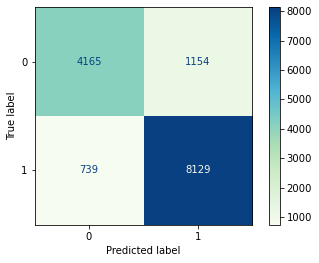

In [81]:
%%time
from sklearn.naive_bayes  import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred_classifier = classifier.predict(X_test)
print('Naive Bayes Results:')
print(classification_report(y_test, y_pred_classifier))
confusion_matrix = confusion_matrix(y_test,y_pred_classifier)
print("\nConfusion Matrix\n", confusion_matrix)
plot_confusion_matrix(classifier, X_test, y_test,cmap="GnBu");
print("Multinomial Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_classifier).round(2)*100)

### TESTING

In [100]:
test_set = ['i hate computer science']
new_test = bow_transformer.transform(test_set)
classifier.predict(new_test)
# array([0]) = Negative
# array([1]) = Positive

array([0])

In [101]:
test_set = ['i love computer science']
new_test = bow_transformer.transform(test_set)
classifier.predict(new_test)
# array([0]) = Negative
# array([1]) = Positive

array([1])

### DETECT FROM TWITTER

In [102]:
data['cleaned_text'].iloc[3233]

'shesthatgirl smile love much'

In [103]:
test_set = [data['cleaned_text'].iloc[4999]]
new_test = bow_transformer.transform(test_set)
classifier.predict(new_test)

array([1])

END THANK YOU :>